In [1]:
import numpy as np
import tensorflow as tf
import time
import math
import numpy
import pylab
from PIL import Image
%matplotlib inline

In [2]:
img = Image.open(open('3wolfmoon.jpg'))
img = numpy.asarray(img, dtype='float64') / 256.
img_ = img.transpose(2, 0, 1).reshape(1, 639, 516,3)

In [53]:
tf.set_random_seed(23455)
w_bound = numpy.sqrt(3 * 9 * 9)

images = tf.placeholder(tf.float32, shape=(1, 639, 516, 3))

weights = tf.Variable(tf.random_uniform([9, 9, 3, 2], minval=-1.0 / w_bound, maxval=1.0 / w_bound))
biases = tf.Variable(tf.random_uniform([2], minval=-.5, maxval=.5)) 

conv = tf.nn.conv2d(images, weights, [1, 1, 1, 1], padding='SAME')
hidden = tf.nn.sigmoid(tf.nn.bias_add(conv, biases))

#shape = hidden.get_shape().as_list()
#output = tf.reshape(hidden, [shape[0], shape[3], shape[1], shape[2]])
output = tf.nn.sigmoid(weights)

In [52]:
Accepts a volume of size W1×H1×D1

Requires four hyperparameters:
Number of filters K,
their spatial extent F,
the stride S,
the amount of zero padding P.

Produces a volume of size W2×H2×D2 where:
W2=(W1−F+2P)/S+1
H2=(H1−F+2P)/S+1 (i.e. width and height are computed equally by symmetry)
D2=K
With parameter sharing, it introduces F⋅F⋅D1 weights per filter, for a total of (F⋅F⋅D1)⋅K weights and KK biases.
In the output volume, the dd-th depth slice (of size W2×H2) is the result of performing a 
valid convolution of the dd-th filter over the input volume with a stride of S, and then offset by d-th bias.


SyntaxError: invalid syntax (<ipython-input-52-4235c405109d>, line 1)

In [73]:
print img.shape
print img.transpose(2, 0, 1).shape
print img.transpose(2, 0, 1).reshape(1, 639, 516,3).shape
print filtered_img.shape

#W2 = (639-9)+1
#H2 = (516-9)+1
#D2 = 2
#print W2, H2, D2



(639, 516, 3)
(3, 639, 516)
(1, 639, 516, 3)
(1, 9, 9, 3, 2)


In [54]:
sess = tf.InteractiveSession()
tf.initialize_all_variables().run()
filtered_img = sess.run([output], feed_dict={images:img_})
filtered_img = np.array(filtered_img)

Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x1029dc750>> ignored


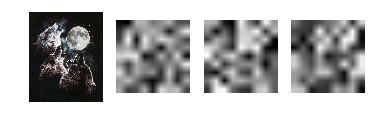

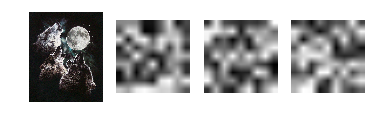

In [72]:
# plot original image and first and second components of output
pylab.subplot(1, 4, 1); pylab.axis('off'); pylab.imshow(img)
pylab.gray();
mine = filtered_img.transpose(0, 4, 3, 1,2)
pylab.subplot(1, 4, 2); pylab.axis('off'); pylab.imshow(mine[0, 0, 0, :, :])
pylab.subplot(1, 4, 3); pylab.axis('off'); pylab.imshow(mine[0, 0, 1, :, :])
pylab.subplot(1, 4, 4); pylab.axis('off'); pylab.imshow(mine[0, 0, 2, :, :])
pylab.show()

pylab.subplot(2, 4, 1); pylab.axis('off'); pylab.imshow(img)
pylab.gray();

pylab.subplot(2, 4, 2); pylab.axis('off'); pylab.imshow(mine[0, 1, 0, :, :])
pylab.subplot(2, 4, 3); pylab.axis('off'); pylab.imshow(mine[0, 1, 1, :, :])
pylab.subplot(2, 4, 4); pylab.axis('off'); pylab.imshow(mine[0, 1, 2, :, :])
pylab.show()

In [74]:
Accepts a volume of size W1×H1×D1

Requires three hyperparameters:
their spatial extent F,
the stride S,

Produces a volume of size W2×H2×D2 where:
W2=(W1−F)/S+1
H2=(H1−F)/S+1
D2=D1

Introduces zero parameters since it computes a fixed function of the input
Note that it is not common to use zero-padding for Pooling layers

SyntaxError: invalid syntax (<ipython-input-74-2c12514ea612>, line 1)

In [ ]:
h_pool1 = tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


In [ ]:
import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

x.initializer.run()

sub = tf.sub(x, a)
print sub.eval()

sess.close()
